In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
all_files=glob.glob("./states[0-9].csv")
li= []
for filename in all_files:
    dataframe=pd.read_csv(filename,index_col=None, header=0)
    li.append(dataframe)
us_census=pd.concat(li,axis=0,ignore_index=True)   


In [3]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [4]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [5]:
us_census['Income']=us_census.Income.str.strip('$')
us_census[['Male','Female']]=us_census.GenderPop.str.split("_",expand=True)
us_census.drop(['GenderPop'],axis=1,inplace=True)
us_census=us_census.replace('F','',regex=True)
us_census=us_census.replace('M','',regex=True)
us_census=us_census.replace('%','',regex=True)
us_census=us_census.replace('',np.NaN,regex=True)

In [29]:
us_census.loc[:,'Hispanic':'Income'] = round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),2)
us_census['Male']=us_census['Male'].astype(int)
us_census['Female'].fillna(us_census['TotalPop']-us_census['Male'],inplace=True)
us_census['Female']=us_census['Female'].astype(int)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
6,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810


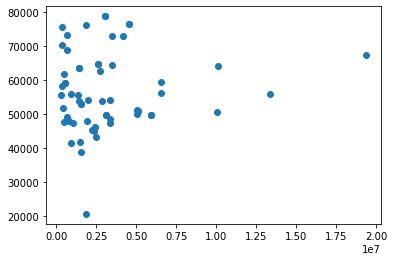

In [7]:
plt.scatter(us_census['Female'], us_census['Income']) 
plt.show()

In [8]:
us_census.drop_duplicates(inplace=True)

In [9]:
us_census.duplicated().any()

False

In [10]:
us_census.drop(['Unnamed: 0'] ,axis=1,inplace=True)

In [11]:
histo=round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x : x*us_census['TotalPop']/100))
histo

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0
5,1096957.0,3689955.0,187401.0,30090.0,140419.0,NaN
6,1096957.0,3689955.0,187401.0,30090.0,140419.0,NaN
7,560543.0,2431893.0,371898.0,4671.0,144448.0,719.0
8,81713.0,598767.0,192147.0,2409.0,30295.0,NaN
9,59374.0,214317.0,335267.0,1295.0,21885.0,194.0


In [12]:
histo.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [13]:
histo['Pacific'].fillna(method='bfill' ,inplace=True)

In [14]:
histo.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,719
6,1096957,3689955,187401,30090,140419,719
7,560543,2431893,371898,4671,144448,719
8,81713,598767,192147,2409,30295,194
9,59374,214317,335267,1295,21885,194


array([[<AxesSubplot:title={'center':'Hispanic'}>]], dtype=object)

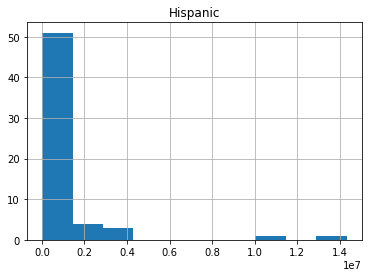

In [15]:
histo.hist(column='Hispanic')

array([[<AxesSubplot:title={'center':'White'}>]], dtype=object)

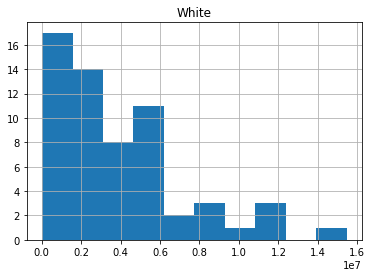

In [16]:
histo.hist(column='White')

array([[<AxesSubplot:title={'center':'Black'}>]], dtype=object)

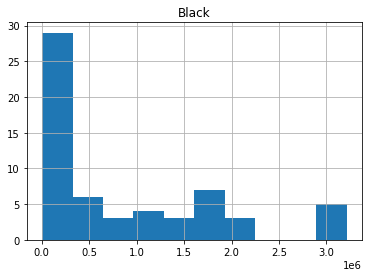

In [17]:
histo.hist(column='Black')

array([[<AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

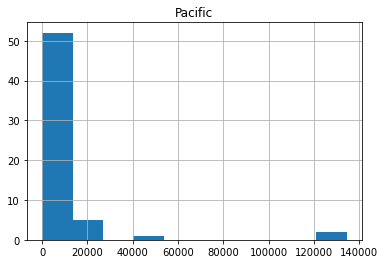

In [18]:
histo.hist(column='Pacific')

array([[<AxesSubplot:title={'center':'Native'}>]], dtype=object)

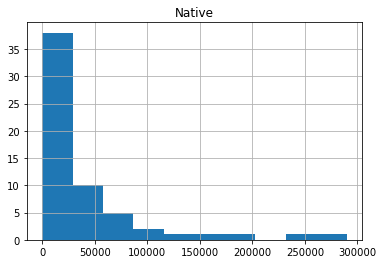

In [19]:
histo.hist(column='Native')

array([[<AxesSubplot:title={'center':'Asian'}>]], dtype=object)

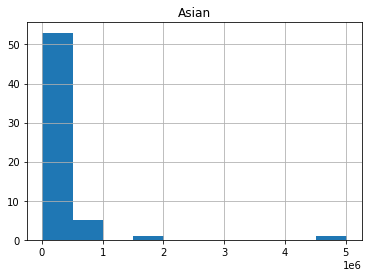

In [20]:
histo.hist(column='Asian')

In [21]:
inventory=pd.read_csv("inventory.csv")
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [22]:
staten_island=inventory.iloc[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [23]:
product_request=staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [24]:
seed_request=inventory.loc[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [25]:
inventory['in_stock']=inventory['quantity']>0
inventory['total_value']=inventory['quantity']*inventory['price']


In [26]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type,row.product_description)

In [27]:
inventory['full_description']=inventory.apply(combine_lambda,axis=1)

In [28]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
